<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/multivariable-CASAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [5]:
# Import data
data = pd.read_csv('https://drive.google.com/uc?id=1VNg7M4u4wluLLqEeSgU3EEduFd6Q84NZ')

# Extract data into X and y
X = data[['Size', 'Bedrooms']]
y = data['Price']

# Normalize our features
X = (X - X.mean()) / X.std()

# Add a 1 column to the start to allow vectorized gradient descent
X = np.c_[np.ones(X.shape[0]), X]

In [6]:
X.shape

(47, 3)

In [7]:
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

In [8]:
def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

In [12]:
# Set hyperparameters
alpha = 0.01
iterations = 1000
# Initialize Theta Values to 0
theta = np.zeros(X.shape[1])
initial_cost, _ = cost_function(X, y, theta)
print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

With initial theta values of [0. 0. 0.], cost error is 65591548106.45744


In [10]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

In [13]:
theta, cost_num = gradient_descent(X, y, theta, alpha, iterations)
print(theta)

[340397.96353532 109848.00846026  -5866.45408497]


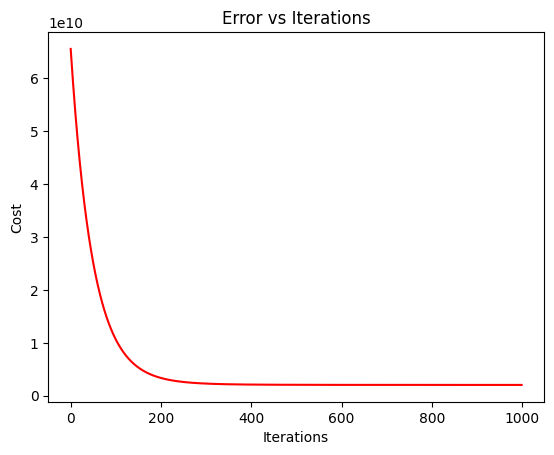

In [11]:
theta, cost_num = gradient_descent(X, y, theta, alpha, iterations)
# Display cost chart
plotChart(iterations, cost_num)